In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pandas: for reading, processing, and analyzing tabular data
# matplotlib.pyplot: for creating static, animated, and interactive plots
# numpy: for numerical operations (e.g., working with arrays, logs, NaNs)

In [30]:
file_path = r'C:\Users\nages\Downloads\sample_datasets.xlsx'
applications_df = pd.read_excel(file_path, sheet_name="applications", engine="openpyxl")
applications_df.head()

,Unnamed: 0,application_id,customer_id,store,submit_date,approved,approved_date,approved_amount,dollars_used,lease_grade
0,0,QF3MF29MZL80KPRE,755880622768,store_74,2022-11-18 04:17:26,False,NaT,NaN,NaN,C
1,1,X268IFWKNYXB99QI,332145121573,store_50,2022-04-17 00:46:48,False,NaT,NaN,NaN,D
2,2,R9C3GKI5H8HUS5D3,144890296478,store_101,2023-12-17 12:10:12,True,2023-12-19 12:10:12,3294.0,2318.0,A
3,3,FBJWF9S7OP4JR3GH,419615144299,store_54,2023-09-30 08:59:46,False,NaT,NaN,NaN,F
4,4,BKVGSPWKJ2O98AJ9,848253698374,store_137,2022-10-03 00:20:29,True,2022-10-03 00:20:29,2874.0,NaN,B


In [31]:
# Check the data types, null values, and structure of the dataset
applications_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       65535 non-null  int64         
 1   application_id   65535 non-null  object        
 2   customer_id      65535 non-null  int64         
 3   store            65535 non-null  object        
 4   submit_date      65535 non-null  object        
 5   approved         65535 non-null  bool          
 6   approved_date    32756 non-null  datetime64[ns]
 7   approved_amount  32756 non-null  float64       
 8   dollars_used     16274 non-null  float64       
 9   lease_grade      65535 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 4.6+ MB


In [32]:
#TASK 1 - Applications Overview

# Convert 'submit_date' to datetime format.
# 'errors="coerce"' ensures invalid dates are converted to NaT (null)
applications_df['submit_date'] = pd.to_datetime(applications_df['submit_date'], errors='coerce')
applications_df['submit_day'] = applications_df['submit_date'].dt.date

# Extracting just the date (no time) and storing in a new column 'submit_day'

# - num_applications: total number of applications submitted that day
# - num_approved: number of applications approved (boolean True values)
# - num_used: number of applications where dollars were actually used (non-null values in 'dollars_used')

daily_metrics = applications_df.groupby('submit_day').agg(
    num_applications=('application_id', 'count'),
    num_approved=('approved', lambda x: (x == True).sum()),
    num_used=('dollars_used', lambda x: x.notnull().sum())
).reset_index()


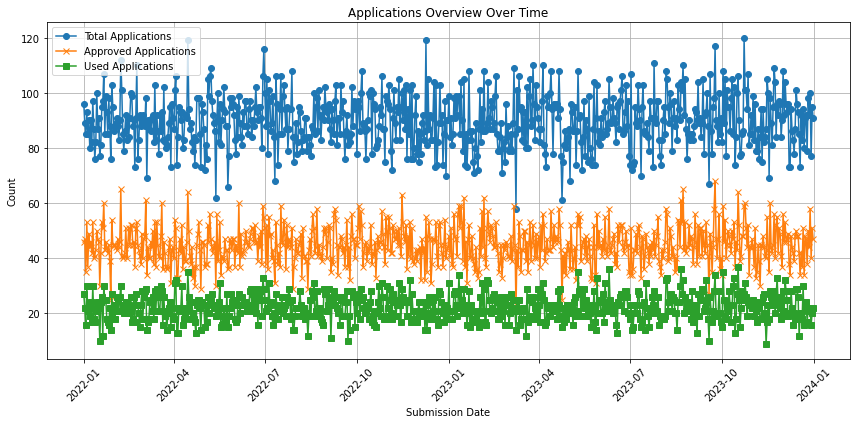

In [33]:
# Plotting the average approved vs average used dollar amounts over time

plt.figure(figsize=(12, 6))
plt.plot(daily_metrics['submit_day'], daily_metrics['num_applications'], label='Total Applications', marker='o')
plt.plot(daily_metrics['submit_day'], daily_metrics['num_approved'], label='Approved Applications', marker='x')
plt.plot(daily_metrics['submit_day'], daily_metrics['num_used'], label='Used Applications', marker='s')

plt.xlabel('Submission Date')
plt.ylabel('Count')
plt.title('Applications Overview Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



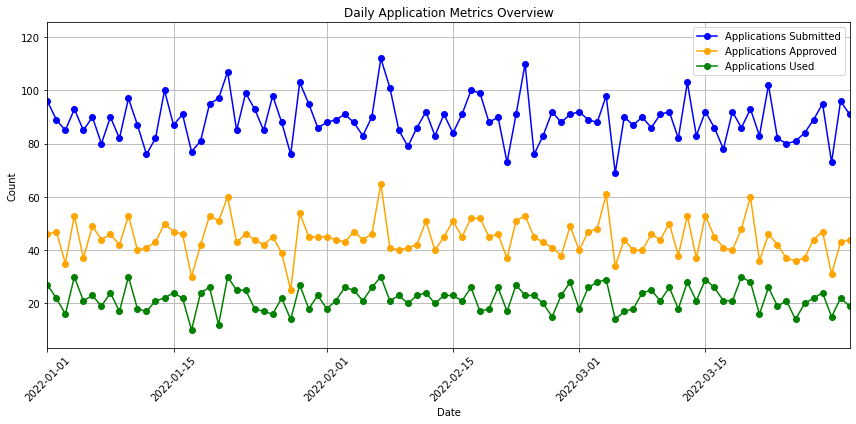

In [34]:
import datetime
import matplotlib.pyplot as plt

# Convert date limits if needed (you can change these as per your data)
start_date = datetime.datetime.strptime('01-01-2022', '%d-%m-%Y').date()
end_date = datetime.datetime.strptime('31-03-2022', '%d-%m-%Y').date()

# Sort by date for proper plotting
daily_metrics = daily_metrics.sort_values('submit_day')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each metric with a distinct color
plt.plot(daily_metrics['submit_day'], daily_metrics['num_applications'], color='blue', marker='o', label='Applications Submitted')
plt.plot(daily_metrics['submit_day'], daily_metrics['num_approved'], color='orange', marker='o', label='Applications Approved')
plt.plot(daily_metrics['submit_day'], daily_metrics['num_used'], color='green', marker='o', label='Applications Used')

# Add axis labels and title
plt.title('Daily Application Metrics Overview')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Set x-axis range
plt.xlim(start_date, end_date)

# Show legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


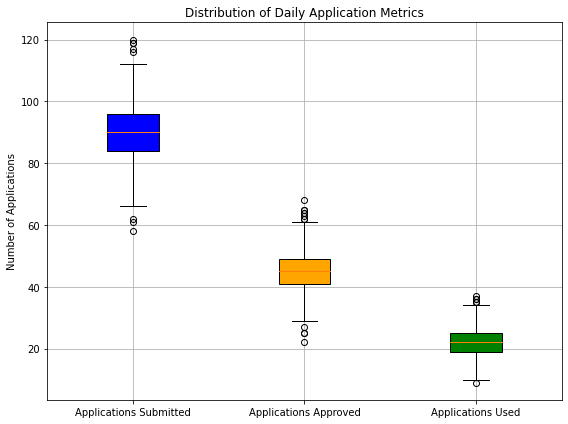

In [35]:
import matplotlib.pyplot as plt

# Prepare data for boxplot
data_to_plot = [
    daily_metrics['num_applications'],
    daily_metrics['num_approved'],
    daily_metrics['num_used']
]

labels = ['Applications Submitted', 'Applications Approved', 'Applications Used']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(8, 6))
box = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Color each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribution of Daily Application Metrics')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
#TASK 2 - Daily Averages Analysis
# Ensuring the 'submit_date' is in datetime format
applications_df['submit_date'] = pd.to_datetime(applications_df['submit_date'], errors='coerce')

# Creating a new column 'submit_day' that strips the time part for daily grouping
applications_df['submit_day'] = applications_df['submit_date'].dt.date

# Previewing to confirm the column was created
applications_df[['submit_date', 'submit_day']].head()

,submit_date,submit_day
0,2022-11-18 04:17:26,2022-11-18
1,2022-04-17 00:46:48,2022-04-17
2,2023-12-17 12:10:12,2023-12-17
3,2023-09-30 08:59:46,2023-09-30
4,2022-10-03 00:20:29,2022-10-03


In [37]:
# Group by submission day and calculate:
# Average approved amount
# Average dollar amount used

avg_amounts = applications_df.groupby('submit_day').agg(
    avg_approved_amount=('approved_amount', 'mean'),
    avg_dollars_used=('dollars_used', 'mean')
).reset_index()

# Viewing the first few rows of calculated averages
avg_amounts.head()


,submit_day,avg_approved_amount,avg_dollars_used
0,2022-01-01,3138.630435,1561.407407
1,2022-01-02,2968.063830,1732.318182
2,2022-01-03,3050.428571,1720.625000
3,2022-01-04,3477.264151,1858.100000
4,2022-01-05,3156.918919,1398.666667


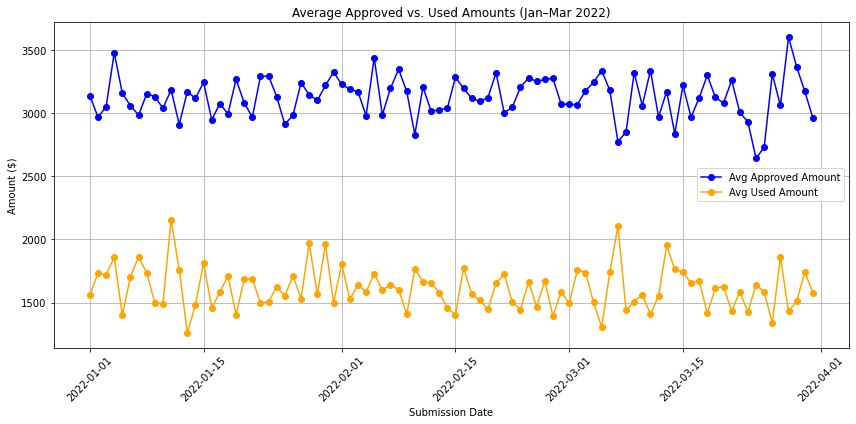

In [39]:
import datetime
import matplotlib.pyplot as plt

# Define the 3-month date range
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2022, 3, 31)

# Filter the DataFrame to only include rows within the range
filtered_avg = avg_amounts[
    (avg_amounts['submit_day'] >= start_date) & 
    (avg_amounts['submit_day'] <= end_date)
]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(filtered_avg['submit_day'], filtered_avg['avg_approved_amount'], label='Avg Approved Amount', color='blue', marker='o')
plt.plot(filtered_avg['submit_day'], filtered_avg['avg_dollars_used'], label='Avg Used Amount', color='orange', marker='o')

# Formatting
plt.xlabel('Submission Date')
plt.ylabel('Amount ($)')
plt.title('Average Approved vs. Used Amounts (Jan–Mar 2022)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


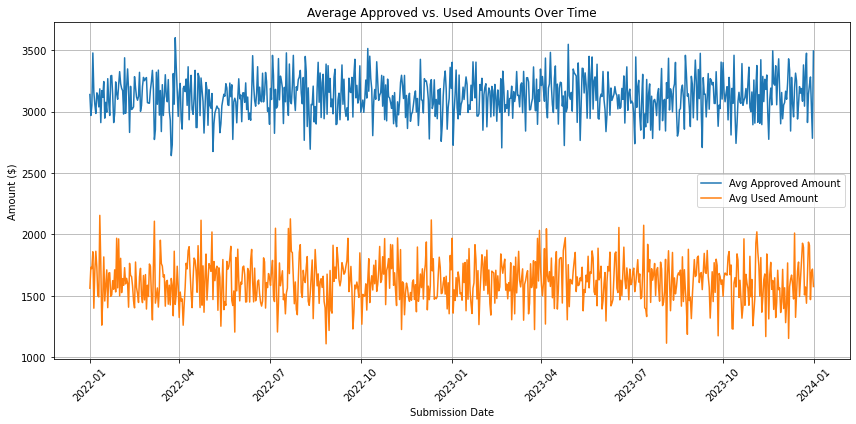

In [40]:
# Plotting the average approved vs average used dollar amounts over time

plt.figure(figsize=(12, 6))
plt.plot(avg_amounts['submit_day'], avg_amounts['avg_approved_amount'], label='Avg Approved Amount')
plt.plot(avg_amounts['submit_day'], avg_amounts['avg_dollars_used'], label='Avg Used Amount')

# Adding labels and formatting it
plt.xlabel('Submission Date')
plt.ylabel('Amount ($)')
plt.title('Average Approved vs. Used Amounts Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
#TASK 3 - Store-Level Performance Metrics
# Group by store and compute all relevant metrics
store_metrics = applications_df.groupby('store').agg(
    num_applications=('application_id', 'count'),
    num_approved=('approved', lambda x: (x == True).sum()),
    approved_amount_total=('approved_amount', 'sum'),
    num_used=('dollars_used', lambda x: x.notnull().sum()),
    used_amount_total=('dollars_used', 'sum')
).reset_index()

# Calculating the additional metrics
store_metrics['approval_rate'] = (
    store_metrics['num_approved'] / store_metrics['num_applications']
) * 100

store_metrics['usage_rate'] = (
    store_metrics['num_used'] / store_metrics['num_approved']
).replace([np.inf, -np.inf], np.nan) * 100

store_metrics['usage_vs_approval_pct'] = (
    store_metrics['used_amount_total'] / store_metrics['approved_amount_total']
).replace([np.inf, -np.inf], np.nan) * 100

# Round off for readability
store_metrics = store_metrics.round(2)

# Displaying the result
store_metrics.head(10)



,store,num_applications,num_approved,approved_amount_total,num_used,used_amount_total,approval_rate,usage_rate,usage_vs_approval_pct
0,store_0,284,146,448420.0,69.0,107970.0,51.41,47.26,24.08
1,store_1,277,136,431736.0,70.0,114715.0,49.10,51.47,26.57
2,store_10,253,128,388397.0,60.0,94609.0,50.59,46.88,24.36
3,store_100,257,134,431148.0,63.0,100645.0,52.14,47.01,23.34
4,store_101,257,130,405727.0,63.0,107608.0,50.58,48.46,26.52
5,store_102,273,136,404044.0,58.0,101340.0,49.82,42.65,25.08
6,store_103,239,129,405962.0,57.0,101780.0,53.97,44.19,25.07
7,store_104,253,134,401980.0,61.0,100515.0,52.96,45.52,25.00
8,store_105,286,145,447852.0,70.0,100685.0,50.70,48.28,22.48
9,store_106,230,113,354825.0,54.0,85418.0,49.13,47.79,24.07


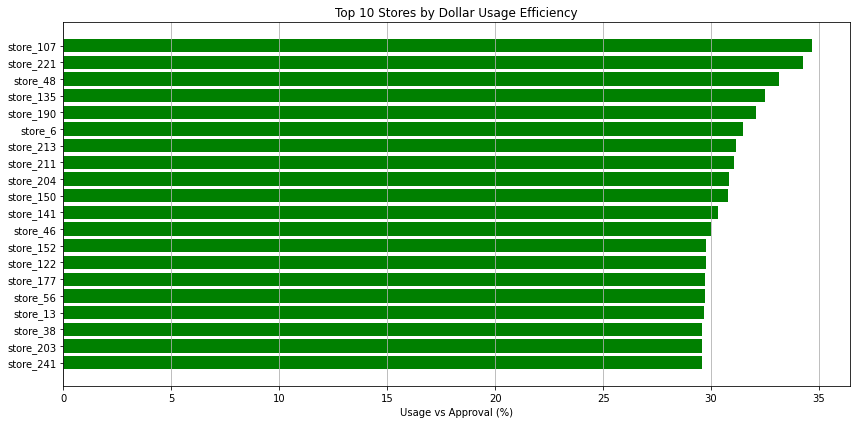

In [42]:
# Sort by usage_vs_approval_pct
top_stores = store_metrics.sort_values(by='usage_vs_approval_pct', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_stores['store'], top_stores['usage_vs_approval_pct'], color='green')
plt.xlabel('Usage vs Approval (%)')
plt.title('Top 10 Stores by Dollar Usage Efficiency')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


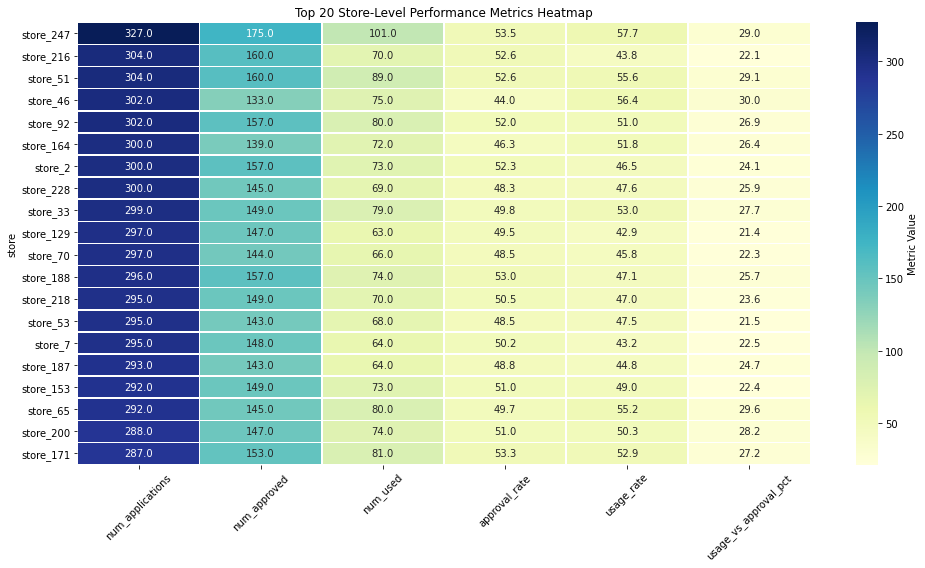

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 20 stores by application count for readability
top_stores = store_metrics.nlargest(20, 'num_applications')

# Set 'store' as index for plotting
heatmap_data = top_stores.set_index('store')[[
    'num_applications', 'num_approved', 'num_used',
    'approval_rate', 'usage_rate', 'usage_vs_approval_pct'
]]

# Plot heatmap
plt.figure(figsize=(14, 8))  # Bigger figure for clarity
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Metric Value'}
)

plt.title('Top 20 Store-Level Performance Metrics Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
#TASK 4
# Load the 'customers' and 'marketing' tables
customers_df = pd.read_excel(file_path, sheet_name='customers', engine='openpyxl')
marketing_df = pd.read_excel(file_path, sheet_name='marketing', engine='openpyxl')

# Drop unnamed index columns
customers_df = customers_df.drop(columns=[col for col in customers_df.columns if 'Unnamed' in col], errors='ignore')
marketing_df = marketing_df.drop(columns=[col for col in marketing_df.columns if 'Unnamed' in col], errors='ignore')

# Merge applications with customers to get campaign info
apps_with_customers = pd.merge(applications_df, customers_df[['customer_id', 'campaign']], on='customer_id', how='left')

# Merge with marketing to get campaign names and spend
apps_with_marketing = pd.merge(apps_with_customers, marketing_df, left_on='campaign', right_on='id', how='left')

# Remove rows where campaign name is missing (i.e., no campaign)
apps_with_marketing = apps_with_marketing[apps_with_marketing['name'].notna()]

# Group by campaign name and calculate total used amount
campaign_usage = apps_with_marketing.groupby('name').agg(
    used_amount_total=('dollars_used', 'sum'),
    campaign_spend=('spend', 'first')  # assuming spend is same for each campaign
).reset_index()

# Fill NaNs (if any) and round values
campaign_usage = campaign_usage.fillna(0).round(2)

# Sort and preview
campaign_usage.sort_values(by='used_amount_total', ascending=False).head()



,name,used_amount_total,campaign_spend
9,No Campaign,9669848.0,0
13,Trade Shows,1281597.0,3344380
5,Google Ads,1247539.0,4798711
14,Twitter Ads,1226074.0,3996752
1,Content Marketing,1202427.0,2728930


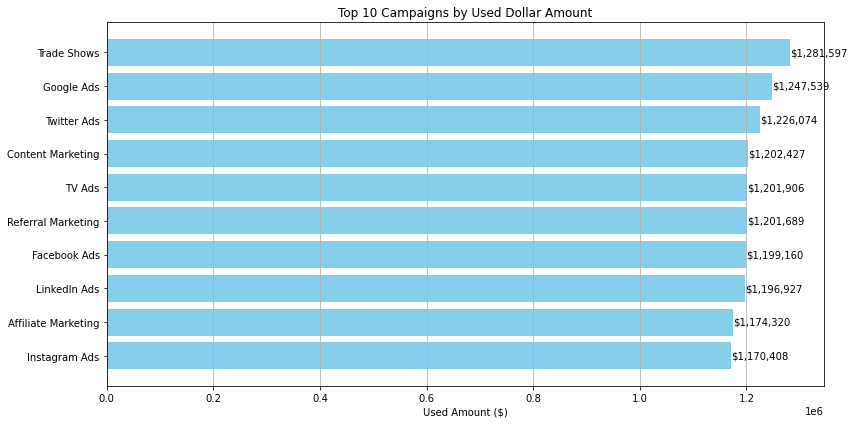

In [45]:
# Filter out rows where campaign name is missing or is "No Campaign"
filtered_campaign_usage = campaign_usage[
    campaign_usage['name'].notna() & 
    (campaign_usage['name'].str.lower() != 'no campaign')
]

# Sort by used amount and take top 10
top_campaigns = filtered_campaign_usage.sort_values(by='used_amount_total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_campaigns['name'], top_campaigns['used_amount_total'], color='skyblue')

# Label each bar with used amount
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f"${width:,.0f}", va='center')

plt.title('Top 10 Campaigns by Used Dollar Amount')
plt.xlabel('Used Amount ($)')
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.grid(axis='x')
plt.show()


In [46]:
#TASK 5

#  Merge applications with income info 
apps_with_income = pd.merge(
    applications_df,
    customers_df[['customer_id', 'income']],
    on='customer_id',
    how='left'
)

# Drop records with no income value
apps_with_income = apps_with_income.dropna(subset=['income'])

#  Define income bands
# Each range includes the lower bound and excludes the upper bound (right=False)
income_bins = [0, 5000, 10000, 20000, 50000, 100000]
income_labels = ['Very Low', 'Low', 'Mid', 'High', 'Very High']

# Meaning of each label based on bins:
# Very Low   = 0      to < 5,000
# Low        = 5,000  to < 10,000
# Mid        = 10,000 to < 20,000
# High       = 20,000 to < 50,000
# Very High  = 50,000 to < 100,000

apps_with_income['income_band'] = pd.cut(
    apps_with_income['income'],
    bins=income_bins,
    labels=income_labels,
    include_lowest=True,
    right=False
)

# Ensure all labels appear in order, even if some have 0 records
apps_with_income['income_band'] = apps_with_income['income_band'].cat.set_categories(
    income_labels, ordered=True
)

# --- Aggregate key metrics by income band ---
income_metrics = apps_with_income.groupby('income_band', observed=True).agg(
    num_apps=('application_id', 'count'),
    approval_rate=('approved', lambda x: (x == True).mean() * 100),
    avg_approved_amount=('approved_amount', 'mean'),
    avg_used_amount=('dollars_used', 'mean')
).round(2).reset_index()

# Fill any missing values in numeric columns (e.g., from empty bands)
income_metrics[income_metrics.columns.difference(['income_band'])] = income_metrics[
    income_metrics.columns.difference(['income_band'])
].fillna(0)


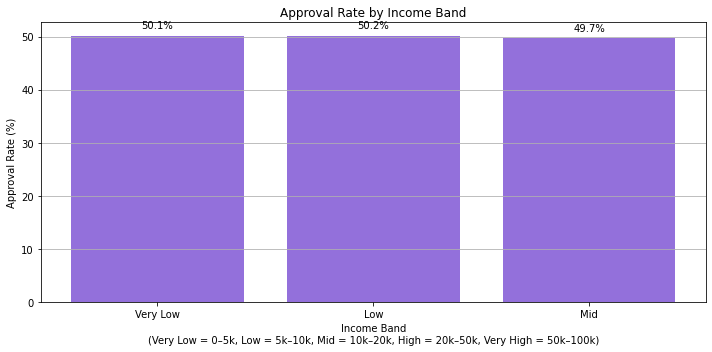

In [47]:
#  GRAPH 1 
# Bar chart: Approval Rate by Income Band
plt.figure(figsize=(10, 5))
bars = plt.bar(income_metrics['income_band'], income_metrics['approval_rate'], color='mediumpurple')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom')

plt.title('Approval Rate by Income Band')
plt.xlabel('Income Band\n(Very Low = 0–5k, Low = 5k–10k, Mid = 10k–20k, High = 20k–50k, Very High = 50k–100k)')
plt.ylabel('Approval Rate (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

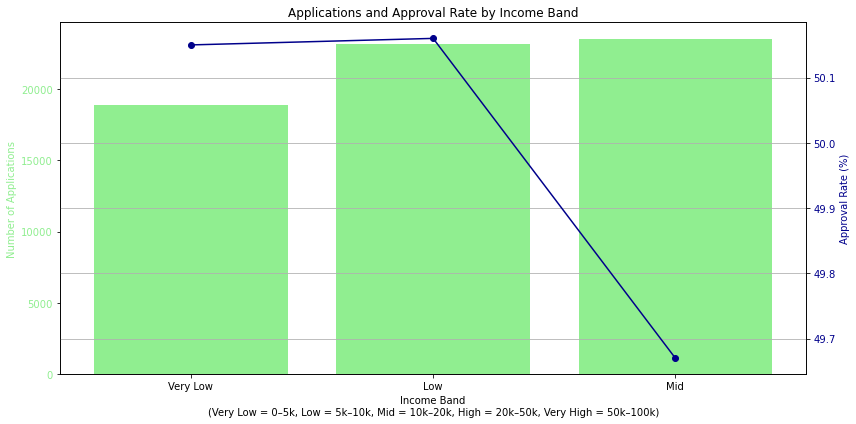

In [48]:
# GRAPH 2 
# Number of Applications and Approval Rate
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of applications
color = 'lightgreen'
ax1.bar(income_metrics['income_band'], income_metrics['num_apps'], color=color)
ax1.set_xlabel('Income Band\n(Very Low = 0–5k, Low = 5k–10k, Mid = 10k–20k, High = 20k–50k, Very High = 50k–100k)')
ax1.set_ylabel('Number of Applications', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for approval rate
ax2 = ax1.twinx()
color = 'darkblue'
ax2.plot(income_metrics['income_band'], income_metrics['approval_rate'], color=color, marker='o')
ax2.set_ylabel('Approval Rate (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Applications and Approval Rate by Income Band')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
